# Prueba mediciones en python

In [127]:
# Al instalar pandas se instala numpy
try:
    import pandas as pd
    import numpy as np
except ImportError:
    from pip._internal import main as pip
    pip(['install', '--user', 'pandas'])
    import pandas as pd
    import numpy as np
    
#Es
try:
    import matplotlib.pyplot as plt
except ImportError:
    from pip._internal import main as pip
    pip(['install', '--user', 'matplotlib'])
    import matplotlib.pyplot as plt

import random
from math import sqrt

###  Generador de letras aleatorias

In [128]:
valor_a = ord('a')
distancia_z_a = ord('z')-ord('a')


def genera_letra():
    import random
    return chr(valor_a+random.randint(0, distancia_z_a))


### Generador de ficheros de entrada

In [129]:

def generate_inputfile(problem_length: int, inputfilename: str="in.txt") -> None:
    input_file = open(inputfilename, 'w')
    prueba = ""
    # Generamos las subcadenas del problema
    for _ in range(3):
        # Generamos cada subcadena con 3 letras de longitud
        for _2 in range(3):
            prueba += genera_letra()
        # Escribimos la subcadena en el fichero de entrada
        input_file.write(prueba+"\n")
        prueba = ""

    for _ in range(problem_length):
        prueba += genera_letra()
    input_file.write(prueba)
    input_file.close()


## Intentando lanzar un programa c++ en python

In [130]:
import time


def tiempo_en_milis():
    return round(time.time() * 1000)


def ejecutar(nombre_entrada: str = "in.txt", nombre_salida: str = "out.txt", problema: str = "it"):
    import subprocess
    import datetime

    fichero_entrada = open(nombre_entrada, "r")
    fichero_salida = open(nombre_salida, "w")
    # Obtener inicio de ejecución

    # tiempo_inicio = time.process_time()
    tiempo_inicio = tiempo_en_milis()
    # Ejecutar proceso
    proc = subprocess.Popen(["./solucion", problema],
                            stdin=fichero_entrada, stdout=fichero_salida)
    proc.wait()
    # Obtener final de ejecución
    # tiempo_final = time.process_time()
    tiempo_final = tiempo_en_milis()

    # Cerrar ficheros de i/o
    fichero_entrada.close()
    fichero_salida.close()

    return tiempo_final-tiempo_inicio


In [131]:

it_out = "iterativa.txt"
dyv_out = "dyv.txt"




def pruebas(nombre_entrada: str = "in.txt", inicio: int = 100,
            final: int = 10000, salto: int = 1) -> pd.DataFrame:
    import subprocess
    df: pd.DataFrame = pd.DataFrame(
        columns=['tamanno', 'it_milis', 'dyv_milis'])

    comp = open("comprobacion.txt", "w")

    proc = subprocess.Popen("make")
    proc.wait()

    generate_inputfile(inicio, nombre_entrada)
    for i in range(inicio, final+1, salto):
        tamanno = int(i)      

        tiempo_it = ejecutar(nombre_entrada, it_out, "it")
        tiempo_dyv = ejecutar(nombre_entrada, dyv_out, "dyv")

        df.loc[len(df)] = [int(tamanno), tiempo_it, tiempo_dyv]
        print(int(tamanno), tiempo_it, tiempo_dyv)
        proc = subprocess.Popen(["diff", it_out, dyv_out], stdout=comp)
        proc.wait()
        df.to_csv("cache.csv")

        file = open(nombre_entrada,"a+")
        for _ in range(salto):
            file.write(genera_letra())
        file.close()

    comp.close()
    return df


### Función que comprueba si ambas soluciones son iguales
Esta funcion permite que se le proporcione un fichero de entrada, no lo valida de tener un error peta, o pedir que se genere, así como especificar el tamaño del problema. 
Utiliza meld para visualizar las diferencias.

In [132]:

def iguales(inputfile: str = "in.txt", tamanno:int = 10000, generar:bool = False) -> pd.DataFrame:
    import subprocess
    if generar:        
        generate_inputfile(tamanno, inputfile)
        
    ejecutar(input_filename=inputfile, problema="it", output_filename="iterativa.txt")    
    ejecutar(input_filename=inputfile, problema="dyv", output_filename="divideyvenceras.txt")
    # Meld compara salidas de forma grafica
    proc = subprocess.Popen(["meld", "iterativa.txt", "divideyvenceras.txt"])


In [133]:
df = pruebas("in.txt",10**0,10**4,10)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_1_to_9999.csv")

g++ -c solucion.cpp
g++ solucion.o -o solucion
1 3 3
11 3 3
21 4 4
31 3 4
41 3 4
51 3 3
61 3 3
71 3 4
81 3 3
91 3 3
101 3 3
111 3 3
121 3 3
131 3 3
141 4 2
151 3 3
161 3 3
171 4 3
181 3 3
191 4 3
201 3 4
211 3 3
221 4 4
231 3 4
241 3 3
251 3 3
261 3 4
271 3 3
281 3 4
291 3 4
301 4 3
311 3 3
321 3 3
331 3 3
341 3 3
351 5 5
361 3 2
371 4 3
381 4 3
391 3 4
401 2 3
411 3 3
421 3 3
431 4 3
441 3 2
451 5 3
461 5 4
471 4 3
481 3 3
491 3 4
501 3 3
511 3 4
521 3 2
531 3 3
541 3 2
551 4 3
561 3 3
571 3 3
581 3 3
591 3 2
601 4 3
611 3 4
621 3 3
631 4 3
641 3 3
651 3 3
661 6 6
671 3 3
681 4 3
691 3 4
701 3 3
711 3 3
721 3 2
731 3 3
741 3 4
751 3 4
761 3 3
771 3 7
781 3 3
791 3 3
801 6 3
811 3 3
821 4 6
831 4 4
841 3 4
851 3 4
861 3 4
871 3 3
881 3 3
891 2 3
901 5 3
911 3 3
921 3 4
931 3 3
941 3 2
951 3 3
961 3 2
971 3 4
981 3 3
991 3 3
1001 3 2
1011 4 3
1021 2 3
1031 3 3
1041 2 6
1051 2 3
1061 3 5
1071 4 4
1081 3 5
1091 5 4
1101 3 4
1111 4 4
1121 4 4
1131 3 4
1141 3 3
1151 3 3
1161 3 4
1171 3 3
11

In [134]:
df = pruebas("in.txt",10**4,10**6,10**3)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e4_to_10e6-1.csv")

make: 'solucion' is up to date.
10000 9 13
11000 6 11
12000 8 11
13000 9 12
14000 5 8
15000 5 8
16000 6 8
17000 5 8
18000 5 9
19000 6 9
20000 5 8
21000 5 8
22000 5 12
23000 7 11
24000 4 9
25000 5 8
26000 5 10
27000 7 11
28000 6 9
29000 6 12
30000 5 9
31000 5 19
32000 5 8
33000 10 20
34000 9 15
35000 9 11
36000 6 10
37000 5 9
38000 7 8
39000 5 8
40000 5 10
41000 6 8
42000 4 8
43000 5 9
44000 7 10
45000 5 10
46000 5 9
47000 7 10
48000 10 9
49000 5 8
50000 5 19
51000 8 14
52000 7 12
53000 7 19
54000 9 14
55000 10 20
56000 8 14
57000 11 19
58000 9 14
59000 5 10
60000 9 15
61000 6 11
62000 7 11
63000 6 12
64000 7 11
65000 8 12
66000 4 19
67000 5 9
68000 6 8
69000 4 9
70000 5 8
71000 4 19
72000 12 20
73000 5 9
74000 8 12
75000 12 19
76000 11 20
77000 11 15
78000 11 19
79000 6 12
80000 5 8
81000 5 9
82000 6 11
83000 6 10
84000 6 11
85000 10 19
86000 11 15
87000 8 14
88000 6 18
89000 7 10
90000 6 10
91000 5 9
92000 6 15
93000 8 11
94000 11 8
95000 4 9
96000 8 17
97000 6 12
98000 6 10
99000 5 9

In [135]:
df = pruebas("in.txt",10**6,10**7,10**3)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e6_to_10e7.csv")

make: 'solucion' is up to date.


KeyboardInterrupt: 

In [ ]:
df = pruebas("in.txt",10**7,10**8,10**3)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e7_to_10e8.csv")

In [ ]:
df = pruebas("in.txt",10**8,10**9,10**4)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e8_to_10e9.csv")

In [ ]:
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas1.csv")

KeyError: "None of ['tamanno'] are in the columns"

In [ ]:
df

,it_milis,dyv_milis
tamanno,,
10.0,1.128661,0.985848
1010.0,1.039746,0.997440
2010.0,1.383340,1.175374
3010.0,1.207123,1.148296
4010.0,3.655709,1.116710
5010.0,1.136397,1.424107
6010.0,1.221863,1.049780
7010.0,1.182373,1.033973
8010.0,1.132325,1.114243


<Axes: xlabel='tamanno'>

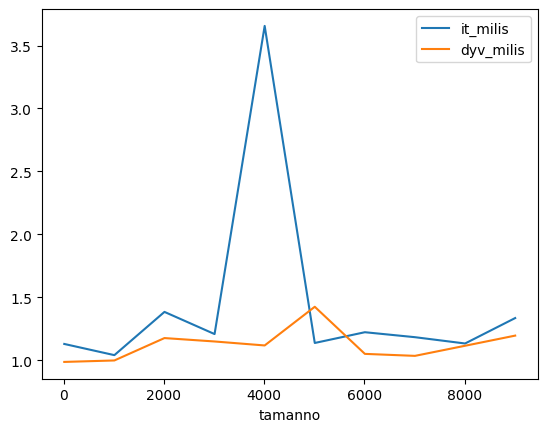

In [ ]:
df.plot()